# Intersection Markings

The data set that I chose was Intersection Markings, because a high volume of Intersection Markings such as crosswalks, indicate a large amount of turns and intersections in the city. If there are a lot of turns in a race, you wouldn't be able to see the cars at full speed, and it wouldn't make for a very entertaining race.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# Importing the data

In [2]:
rawData = pd.read_csv("Intersection_Markings.csv")

* Testing to make sure that the data is correct

In [3]:
rawData.head(10)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267
5,768755224,Crosswalk - Two Lined,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443853,-79.939028
6,1308677189,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443965,-79.938673
7,1159710354,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.445632,-79.931342
8,216672403,Crosswalk - Continental,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-9,40.444583,-79.945557
9,356629441,Crosswalk - Continental,FIFTH AVE,f,Shadyside,8.0,14.0,42003140100,2.0,14.0,4.0,2-26,40.447427,-79.942548


In [4]:
modData = rawData['neighborhood'].value_counts()
modData.head(10)

Central Business District    620
South Side Flats             435
Squirrel Hill South          415
Shadyside                    323
Bloomfield                   302
East Liberty                 254
North Oakland                206
Squirrel Hill North          199
Strip District               192
Central Oakland              148
Name: neighborhood, dtype: int64

* The data is now shifted to show each neighborhoods number of intersection markings.

# Visualizing the data

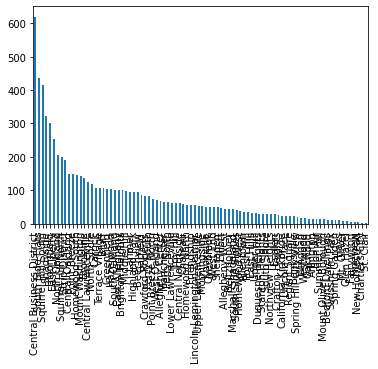

In [5]:
modData.plot.bar()

There are obviously too many neighborhoods in pittsburgh to focus on all of them, so we will only take a look at the most and least amount of intersection markings to see the best and worst neighborhoods to race in by this metric.

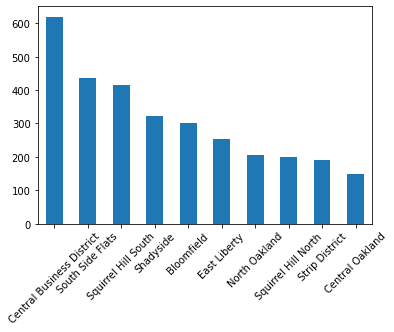

In [15]:
modData.head(10).plot.bar(rot=45)

The central business district is the worst to have a race in by how many markings it has, and it has the most by a lot. It is followed by South Side Flats, and then squirrel hill, which have a similar amount of intersection markings. 

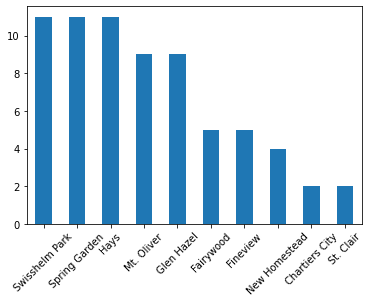

In [14]:
modData.tail(10).plot.bar(rot=45)

This data shows that the two neighborhoods with the least markings are chartiers city and St. Clair. It is followed by New Homestead.

# Converting our data into a dataframe

In [19]:
markingsData = pd.DataFrame({"neighborhood" : modData.axes[0], "Markings" : modData.values})
M_max = markingsData["Markings"].max()
markingsData.head(10)

,neighborhood,Markings
0,Central Business District,620
1,South Side Flats,435
2,Squirrel Hill South,415
3,Shadyside,323
4,Bloomfield,302
5,East Liberty,254
6,North Oakland,206
7,Squirrel Hill North,199
8,Strip District,192
9,Central Oakland,148


# Mapping our Data

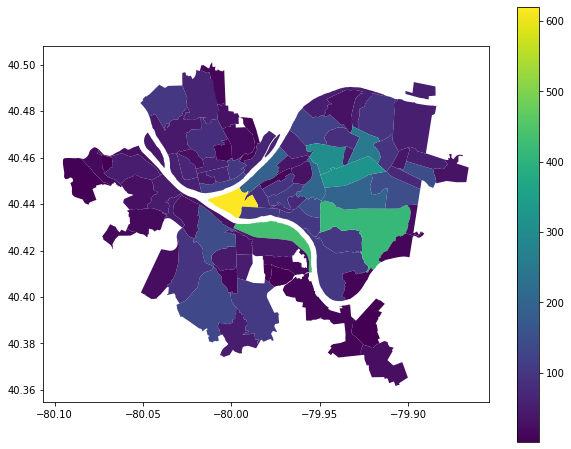

In [23]:
pittsburgh = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
markings_map = pittsburgh.merge(markingsData, how="left", left_on="hood", right_on="neighborhood")
markings_map.plot(column='Markings', legend=True, figsize=(10,8))

# Sources of bias

The map makes it very visible that plays an important role in the number of markings a neighborhood has. Generally, the bigger neighborhood, the warmer color it has on the map. The clear outlier is the Central business district, which is smaller than many of the other neighborhoods, but has the most markings by a lot. The map shows the density of the amount of markings a neighborhood has by comparing the number of markings to the size of the neighborhood. 

# Conclusion

Obviously, the amoung of markings a neighborhood has is not a perfect metric. As shown, the neighborhoods that are the best according to this metric are some of the smallest, and some of the neighborhoods that rank at the very bottom are their simply because of their sheer size. However, this metric can be used along side the other metrics of speed bumbs and road quality. For example, the other metrics had narrowed down the neighborhoods to a certain subset 